# Analyze the sales of the company in order to target new areas of growth

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import statistics

In [2]:
transactions = pd.read_csv('transactions.csv')
print(transactions)

       id_prod                        date session_id client_id
0       0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450
1        2_226  2022-02-03 01:55:53.276402   s_159142     c_277
2        1_374  2021-09-23 15:13:46.938559    s_94290    c_4270
3       0_2186  2021-10-17 03:27:18.783634   s_105936    c_4597
4       0_1351  2021-07-17 20:34:25.800563    s_63642    c_1242
...        ...                         ...        ...       ...
337011   1_671  2021-05-28 12:35:46.214839    s_40720    c_3454
337012   0_759  2021-06-19 00:19:23.917703    s_50568    c_6268
337013  0_1256  2021-03-16 17:31:59.442007     s_7219    c_4137
337014   2_227  2021-10-30 16:50:15.997750   s_112349       c_5
337015  0_1417  2021-06-26 14:38:19.732946    s_54117    c_6714

[337016 rows x 4 columns]


In [3]:
## check to clean for bad data
transactions.describe()

,id_prod,date,session_id,client_id
count,337016,337016,337016,337016
unique,3266,336855,169195,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,1081,13,200,12855


In [4]:
## Replace bad data (date starting with test)
mask = transactions['date'].str.startswith('test_')
transactions.loc[mask, 'date'] = transactions.loc[mask, 'date'].str.replace('test_', '')
print(mask)

0         False
1         False
2         False
3         False
4         False
          ...  
337011    False
337012    False
337013    False
337014    False
337015    False
Name: date, Length: 337016, dtype: bool


In [5]:
## check to clean for bad data
transactions.describe()

,id_prod,date,session_id,client_id
count,337016,337016,337016,337016
unique,3266,336855,169195,8602
top,1_369,2021-03-01 02:30:02.237413,s_0,c_1609
freq,1081,13,200,12855


In [6]:
## check to clean for bad data
mask.describe()

count     337016
unique         2
top        False
freq      336816
Name: date, dtype: object

In [7]:
# How many missing values in data
transactions.isnull().sum().sum()

0

In [8]:
#Check missing by variable
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [9]:
products = pd.read_csv('products.csv')
print(products)

     id_prod   price  categ
0     0_1421   19.99      0
1     0_1368    5.13      0
2      0_731   17.99      0
3      1_587    4.99      1
4     0_1507    3.99      0
...      ...     ...    ...
3282    2_23  115.99      2
3283   0_146   17.14      0
3284   0_802   11.22      0
3285   1_140   38.56      1
3286  0_1920   25.16      0

[3287 rows x 3 columns]


In [10]:
## check to clean for bad data
products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [11]:
## Remove negative 'price' values
cleaned_products = products[products['price'] >= 0]
print(cleaned_products)

     id_prod   price  categ
0     0_1421   19.99      0
1     0_1368    5.13      0
2      0_731   17.99      0
3      1_587    4.99      1
4     0_1507    3.99      0
...      ...     ...    ...
3282    2_23  115.99      2
3283   0_146   17.14      0
3284   0_802   11.22      0
3285   1_140   38.56      1
3286  0_1920   25.16      0

[3286 rows x 3 columns]


In [12]:
## check to clean for bad data
cleaned_products.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [13]:
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [14]:
## left join 'product' table to 'transaction' table
d = pd.merge(transactions, cleaned_products, how='left', on=['id_prod'])
print(d)

       id_prod                        date session_id client_id  price  categ
0       0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450   4.99    0.0
1        2_226  2022-02-03 01:55:53.276402   s_159142     c_277  65.75    2.0
2        1_374  2021-09-23 15:13:46.938559    s_94290    c_4270  10.71    1.0
3       0_2186  2021-10-17 03:27:18.783634   s_105936    c_4597   4.20    0.0
4       0_1351  2021-07-17 20:34:25.800563    s_63642    c_1242   8.99    0.0
...        ...                         ...        ...       ...    ...    ...
337011   1_671  2021-05-28 12:35:46.214839    s_40720    c_3454  31.99    1.0
337012   0_759  2021-06-19 00:19:23.917703    s_50568    c_6268  22.99    0.0
337013  0_1256  2021-03-16 17:31:59.442007     s_7219    c_4137  11.03    0.0
337014   2_227  2021-10-30 16:50:15.997750   s_112349       c_5  50.99    2.0
337015  0_1417  2021-06-26 14:38:19.732946    s_54117    c_6714  17.99    0.0

[337016 rows x 6 columns]


In [15]:
d.isnull().sum()
## production data has extra id_prod values that do not exist in transaction data, therefore there are null columns when
## these datasets are joined together

id_prod         0
date            0
session_id      0
client_id       0
price         303
categ         303
dtype: int64

In [16]:
#perform regular/inner join instead to only bring data that exists in both tables
d1 = transactions.merge(cleaned_products, left_on = 'id_prod', right_on ='id_prod')
print(d1)

       id_prod                        date session_id client_id   price  categ
0       0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450    4.99      0
1       0_1483  2021-10-18 19:16:14.767807   s_106741    c_1576    4.99      0
2       0_1483  2021-11-14 11:11:45.276771   s_119491     c_182    4.99      0
3       0_1483  2021-07-30 19:37:16.087057    s_69222    c_1196    4.99      0
4       0_1483  2021-03-30 14:18:13.403218    s_13545    c_2890    4.99      0
...        ...                         ...        ...       ...     ...    ...
336708  0_1683  2021-12-24 04:37:46.407713   s_139091    c_5508    2.99      0
336709    2_98  2021-03-08 21:10:32.250919     s_3637    c_5967  149.74      2
336710   0_833  2021-09-27 23:22:40.394509    s_96558    c_8260    2.99      0
336711  0_1284  2021-04-14 13:13:06.560397    s_20477    c_1551    1.38      0
336712  0_1116  2021-07-27 04:02:53.408409    s_67633    c_3291    2.97      0

[336713 rows x 6 columns]


In [17]:
## check to clean for bad data
d1.describe()

,price,categ
count,336713.000000,336713.000000
mean,17.215189,0.430156
std,17.855445,0.591082
min,0.620000,0.000000
25%,8.610000,0.000000
50%,13.900000,0.000000
75%,18.990000,1.000000
max,300.000000,2.000000


In [18]:
d1.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
dtype: int64

In [19]:
customers = pd.read_csv('customers.csv')
print(customers)

     client_id sex  birth
0       c_4410   f   1967
1       c_7839   f   1975
2       c_1699   f   1984
3       c_5961   f   1962
4       c_5320   m   1943
...        ...  ..    ...
8618    c_7920   m   1956
8619    c_7403   f   1970
8620    c_5119   m   1974
8621    c_5643   f   1968
8622      c_84   f   1982

[8623 rows x 3 columns]


In [20]:
## check to clean for bad data
customers.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [21]:
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [22]:
df = d1.merge(customers, left_on = 'client_id', right_on ='client_id')
print(df)

       id_prod                        date session_id client_id  price  categ  \
0       0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450   4.99      0   
1       0_1085  2021-09-29 11:14:59.793823    s_97382    c_4450   3.99      0   
2       0_1453  2021-08-27 19:50:46.796939    s_81509    c_4450   7.99      0   
3       0_1405  2021-08-27 20:07:25.878440    s_81509    c_4450   4.99      0   
4       0_1392  2021-12-28 11:45:04.072281   s_141302    c_4450   6.30      0   
...        ...                         ...        ...       ...    ...    ...   
336708   1_607  2021-09-25 07:26:00.224331    s_95185    c_4786  26.99      1   
336709   1_673  2021-06-01 00:49:49.781631    s_42350    c_2793  12.99      1   
336710  0_2075  2021-10-09 09:03:48.268536   s_102200    c_2793   8.99      0   
336711  0_1692  2021-09-15 19:42:08.596375    s_90430    c_4478  13.36      0   
336712   0_142  2021-09-25 18:07:25.880052    s_95415    c_1232  19.85      0   

       sex  birth  
0      

In [30]:
## check to clean for bad data
df.describe()

,price,categ,birth
count,336713.000000,336713.000000,336713.000000
mean,17.215189,0.430156,1977.823568
std,17.855445,0.591082,13.524433
min,0.620000,0.000000,1929.000000
25%,8.610000,0.000000,1971.000000
50%,13.900000,0.000000,1980.000000
75%,18.990000,1.000000,1987.000000
max,300.000000,2.000000,2004.000000


In [31]:
df.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
sex           0
birth         0
dtype: int64

##### Central tendency (Mean, Mode, Median) and Dispersion Measures (Variance and Standard Deviation)

In [32]:
round(statistics.mean(df['price']),2)

17.22

In [33]:
statistics.median(df['price'])

13.9

In [34]:
statistics.mode(df['price'])

15.99

In [35]:
round(statistics.variance(df['price']),2)

318.82

In [36]:
round(statistics.stdev(df['price']),2)

17.86

##### Lorenz curve and a Gini coefficient
###### are used to measure the variability of the distribution of income and wealth. Hence, Lorenz Curve is the measure of the deviation of the actual distribution of a statistical series from the line of equal distribution. The extent of this deviation is known as Lorenz Coefficient.

In [37]:
## Sort values by 'price'
df = df.sort_values(by=['price'])
print(df)

       id_prod                        date session_id client_id   price  \
177013   0_202  2021-04-08 17:47:18.158963    s_17806    c_3297    0.62   
261154   0_528  2021-05-29 20:46:36.259964    s_41352    c_3757    0.62   
334699   0_528  2021-10-20 05:44:08.973803   s_107417    c_5606    0.62   
287140   0_202  2021-05-14 15:26:20.597059    s_34456    c_5510    0.62   
81444    0_202  2022-01-06 18:57:12.656309   s_145956    c_2069    0.62   
...        ...                         ...        ...       ...     ...   
49844      2_2  2021-12-04 15:45:14.708313   s_129351    c_4958  300.00   
249749     2_2  2021-06-06 23:14:33.815188    s_45088    c_2467  300.00   
181445     2_2  2021-06-12 08:44:00.882917    s_47558    c_5237  300.00   
49842      2_2  2021-03-26 04:33:19.697459    s_11582    c_4958  300.00   
233193     2_2  2021-03-07 14:07:31.004391     s_3041    c_1001  300.00   

        categ sex  birth  
177013      0   f   1975  
261154      0   f   1959  
334699      0   f 

In [38]:
##Calculate the cumulative sum of the sorted data and divide it by the total sum of the data 
df['cumulative_perc'] = df['price'].cumsum() / df['price'].sum() 
print(df)

       id_prod                        date session_id client_id   price  \
177013   0_202  2021-04-08 17:47:18.158963    s_17806    c_3297    0.62   
261154   0_528  2021-05-29 20:46:36.259964    s_41352    c_3757    0.62   
334699   0_528  2021-10-20 05:44:08.973803   s_107417    c_5606    0.62   
287140   0_202  2021-05-14 15:26:20.597059    s_34456    c_5510    0.62   
81444    0_202  2022-01-06 18:57:12.656309   s_145956    c_2069    0.62   
...        ...                         ...        ...       ...     ...   
49844      2_2  2021-12-04 15:45:14.708313   s_129351    c_4958  300.00   
249749     2_2  2021-06-06 23:14:33.815188    s_45088    c_2467  300.00   
181445     2_2  2021-06-12 08:44:00.882917    s_47558    c_5237  300.00   
49842      2_2  2021-03-26 04:33:19.697459    s_11582    c_4958  300.00   
233193     2_2  2021-03-07 14:07:31.004391     s_3041    c_1001  300.00   

        categ sex  birth  cumulative_perc  
177013      0   f   1975     1.069597e-07  
261154     

In [39]:
##Calculate the Gini coefficient 
area_under_curve = df['cumulative_perc'].sum() / len(df) 
area_between_curve_and_diagonal = 0.5 - area_under_curve 
gini_coefficient = area_between_curve_and_diagonal / 0.5
print(f'The Gini coefficient is {gini_coefficient:.2f}')

The Gini coefficient is 0.39


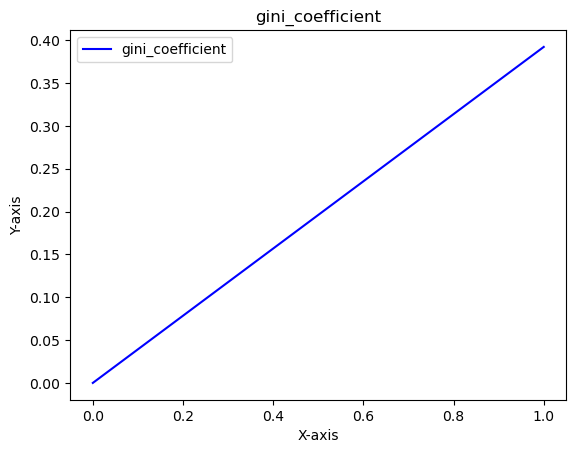

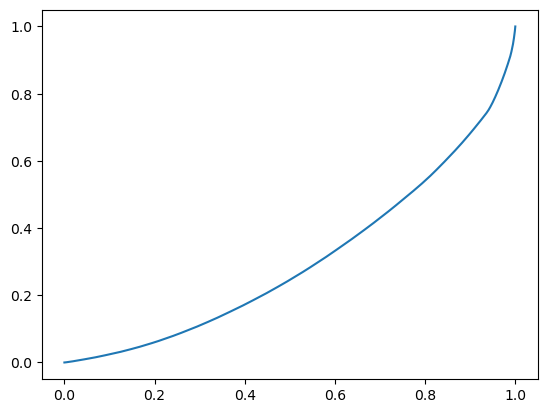

In [40]:
# Generate x values
x = np.linspace(0, 1, 10)

# Define the line equation with the desired gini_coefficient
y = gini_coefficient * x

# Plot the line
##plt.plot(x, y, label='Line with Coefficient 0.39', color='blue')

plt.plot(x, y, label='gini_coefficient', color='blue')

# Add labels and legend
plt.title('gini_coefficient')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()

##Calculate the Lorenz curve 
plt.plot(np.linspace(0, 1, len(df)), df['cumulative_perc'].values)

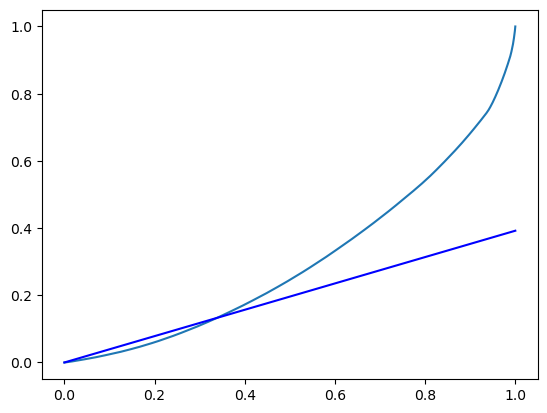

In [41]:
plt.plot(np.linspace(0, 1, len(df)), df['cumulative_perc'].values)
plt.plot(x, y, label='gini_coefficient', color='blue')

#### Graphic representations, including at least one histogram, a representation with boxplots, and a time series graph (i.e a graph in which the abscissa axis represents dates).

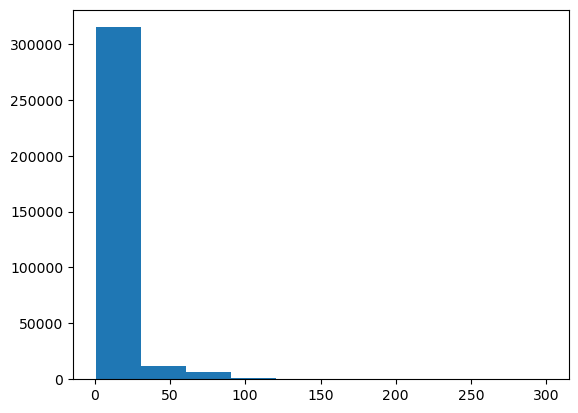

In [42]:
# creating a histogram by Price
plt.hist(df['price']) 
plt.show()

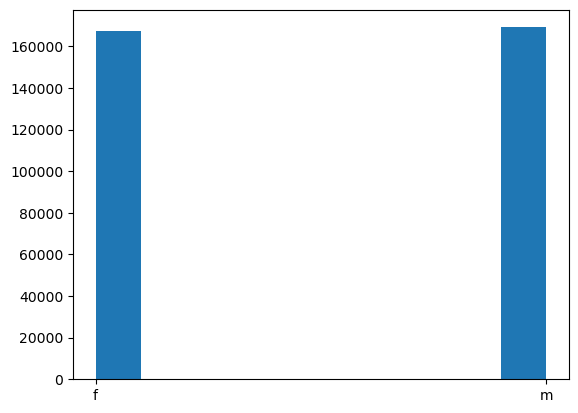

In [43]:
# creating a histogram by sex
plt.hist(df['sex']) 
plt.show()

<Axes: title={'center': 'price'}, xlabel='sex'>

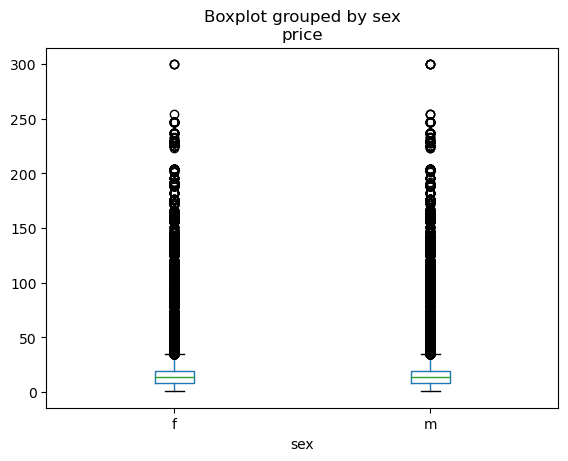

In [44]:
# Boxplot sex vs price
df.boxplot(by='sex',column='price',grid= False)

<Axes: title={'center': 'price'}, xlabel='categ'>

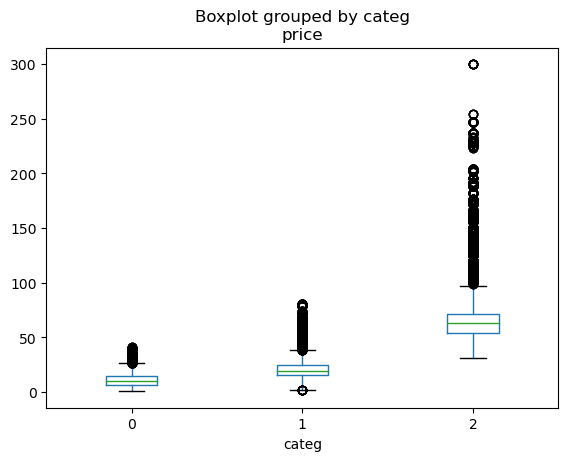

In [45]:
# Boxplot categ vs price
df.boxplot(by='categ',column='price',grid= False)

### Time series graph

In [23]:
df = d1.merge(customers, left_on = 'client_id', right_on ='client_id')
print(df)

       id_prod                        date session_id client_id  price  categ  \
0       0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450   4.99      0   
1       0_1085  2021-09-29 11:14:59.793823    s_97382    c_4450   3.99      0   
2       0_1453  2021-08-27 19:50:46.796939    s_81509    c_4450   7.99      0   
3       0_1405  2021-08-27 20:07:25.878440    s_81509    c_4450   4.99      0   
4       0_1392  2021-12-28 11:45:04.072281   s_141302    c_4450   6.30      0   
...        ...                         ...        ...       ...    ...    ...   
336708   1_607  2021-09-25 07:26:00.224331    s_95185    c_4786  26.99      1   
336709   1_673  2021-06-01 00:49:49.781631    s_42350    c_2793  12.99      1   
336710  0_2075  2021-10-09 09:03:48.268536   s_102200    c_2793   8.99      0   
336711  0_1692  2021-09-15 19:42:08.596375    s_90430    c_4478  13.36      0   
336712   0_142  2021-09-25 18:07:25.880052    s_95415    c_1232  19.85      0   

       sex  birth  
0      

In [29]:
df.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
price                float64
categ                  int64
sex                   object
birth                  int64
month              period[M]
dtype: object

In [24]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

In [32]:
# Cluster dates into months
df['month'] = df['date'].dt.to_period('M')

##df['month'] = df['date'].dt.to_datetime('M')


In [33]:
# Group by month and aggregate values by price
monthly_data = df.groupby('month').agg({'price': 'sum'}).reset_index()
print(monthly_data)

      month      price
0   2021-03  479312.03
1   2021-04  472980.72
2   2021-05  489367.95
3   2021-06  481257.94
4   2021-07  480898.66
5   2021-08  479305.19
6   2021-09  502771.28
7   2021-10  319159.96
8   2021-11  512890.17
9   2021-12  522937.68
10  2022-01  522955.31
11  2022-02  532740.88


In [34]:
monthly_data = monthly_data.set_index('month')

In [35]:
monthly_data.dtypes

price    float64
dtype: object

TypeError: float() argument must be a string or a real number, not 'Period'

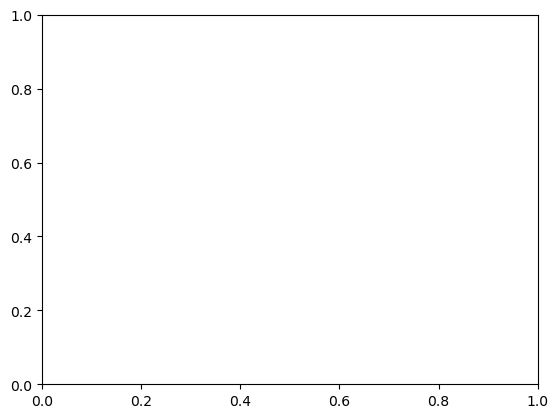

In [41]:
# Plot the time series
## plt.plot(monthly_data['month'], monthly_data['price'], marker='o')
plt.plot(monthly_data.index, monthly_data['price'], marker='o')
plt.xlabel('month')
plt.ylabel('Price')
plt.title('Time Series Plot')
plt.grid(True)
plt.show()

In [110]:
monthly_data['month'] = monthly_data.to_timestamp(monthly_data['month'])

TypeError: unsupported Type RangeIndex

TypeError: float() argument must be a string or a real number, not 'Period'

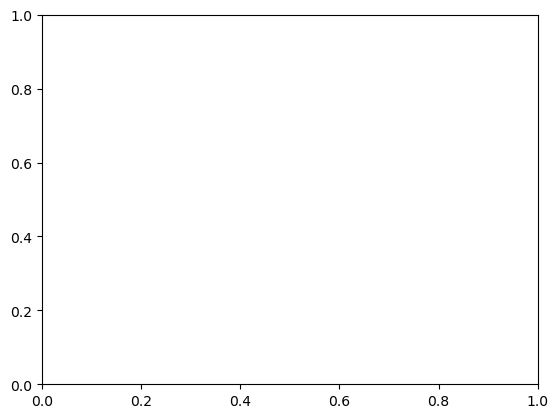

In [102]:
# Plot the time series
plt.plot(monthly_data['month'], monthly_data['price'], marker='o')
plt.xlabel('month')
plt.ylabel('Price')
plt.title('Time Series Plot')
plt.grid(True)
plt.show()

In [98]:
df.shape

(336713, 9)

In [99]:
df.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
price                float64
categ                  int64
sex                   object
birth                  int64
month              period[M]
dtype: object

In [69]:
df['date']=pd.to_datetime(df['date'])

In [70]:
# Print the DataFrame
print(df)

       id_prod                       date session_id client_id  price  categ  \
0       0_1483 2021-04-10 18:37:28.723910    s_18746    c_4450   4.99      0   
1       0_1085 2021-09-29 11:14:59.793823    s_97382    c_4450   3.99      0   
2       0_1453 2021-08-27 19:50:46.796939    s_81509    c_4450   7.99      0   
3       0_1405 2021-08-27 20:07:25.878440    s_81509    c_4450   4.99      0   
4       0_1392 2021-12-28 11:45:04.072281   s_141302    c_4450   6.30      0   
...        ...                        ...        ...       ...    ...    ...   
336708   1_607 2021-09-25 07:26:00.224331    s_95185    c_4786  26.99      1   
336709   1_673 2021-06-01 00:49:49.781631    s_42350    c_2793  12.99      1   
336710  0_2075 2021-10-09 09:03:48.268536   s_102200    c_2793   8.99      0   
336711  0_1692 2021-09-15 19:42:08.596375    s_90430    c_4478  13.36      0   
336712   0_142 2021-09-25 18:07:25.880052    s_95415    c_1232  19.85      0   

       sex  birth  
0        f   1977  

In [71]:
df.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
price                float64
categ                  int64
sex                   object
birth                  int64
dtype: object

In [82]:
# Cluster dates into months
df['month'] = df['date'].dt.to_period('M')

AttributeError: Can only use .dt accessor with datetimelike values

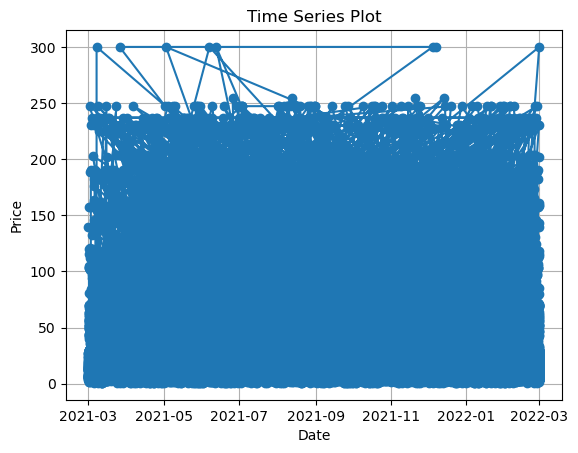

In [72]:
# Plot the time series
plt.plot(df['date'], df['price'], marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series Plot')
plt.grid(True)
plt.show()

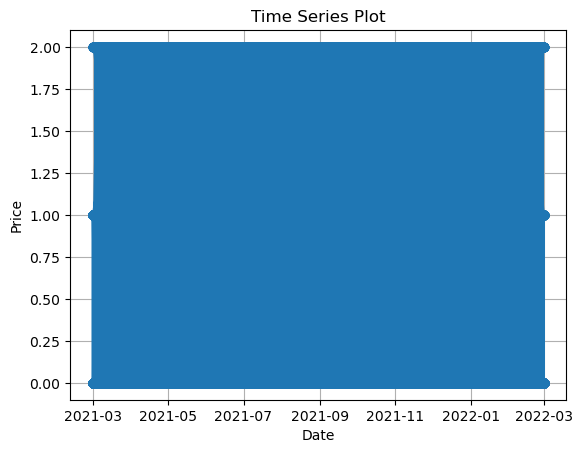

In [73]:
# Plot the time series
plt.plot(df['date'], df['categ'], marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series Plot')
plt.grid(True)
plt.show()

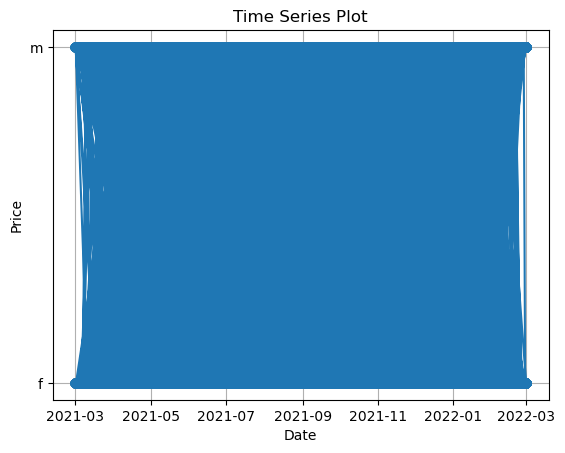

In [74]:
# Plot the time series
plt.plot(df['date'], df['categ'], marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series Plot')
plt.grid(True)
plt.show()

In [ ]:
#They do not run
plt.plot(df.index,df['price'])

In [ ]:
# Creating the time series plot
plt.plot(df.date, df.sex)
plt.show()

### Bivariate analyses.

#### Scatter plot:

In [ ]:
# Load your dataset
# Assuming 'df' is your dataframe with variables 'X' and 'y'

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='X', y='y')
plt.title('Scatter Plot of X vs y')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

#### Simple Linear Regression

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [118]:
df = d1.merge(customers, left_on = 'client_id', right_on ='client_id')
print(df)

       id_prod                        date session_id client_id  price  categ  \
0       0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450   4.99      0   
1       0_1085  2021-09-29 11:14:59.793823    s_97382    c_4450   3.99      0   
2       0_1453  2021-08-27 19:50:46.796939    s_81509    c_4450   7.99      0   
3       0_1405  2021-08-27 20:07:25.878440    s_81509    c_4450   4.99      0   
4       0_1392  2021-12-28 11:45:04.072281   s_141302    c_4450   6.30      0   
...        ...                         ...        ...       ...    ...    ...   
336708   1_607  2021-09-25 07:26:00.224331    s_95185    c_4786  26.99      1   
336709   1_673  2021-06-01 00:49:49.781631    s_42350    c_2793  12.99      1   
336710  0_2075  2021-10-09 09:03:48.268536   s_102200    c_2793   8.99      0   
336711  0_1692  2021-09-15 19:42:08.596375    s_90430    c_4478  13.36      0   
336712   0_142  2021-09-25 18:07:25.880052    s_95415    c_1232  19.85      0   

       sex  birth  
0      

In [44]:
# Split the dataframe into features (X) and target variable (y)
X = df[['birth']]
y = df['price']

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'train_test_split' is not defined

In [46]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

NameError: name 'LinearRegression' is not defined

In [47]:
# Make predictions
y_pred = model.predict(X_test)

NameError: name 'model' is not defined

In [43]:
# Plot the data and the model's predictions
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression') 
##test

NameError: name 'X_test' is not defined